In [3]:
%alias package {__import__('sys').executable} -m pip install --quiet --upgrade --upgrade-strategy eager %l

In [4]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [5]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

In [6]:
%package numpy pandas 

import numpy as np
import pandas as pd
'''
%package swifter
import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=False
)
'''

%package scikit-learn==1.1.3
import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
#import sklearn.svm

#%package scikit-learn-intelex
#import sklearnex
#sklearnex.patch_sklearn()

#%package xgboost
#import xgboost

In [7]:
%package tensorflow tensorflow-gpu

import tensorflow as tf
from tensorflow import keras as keras

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

2022-12-09 23:54:21.014538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 23:54:21.170587: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-09 23:54:21.850997: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib/:/opt/conda/lib/:/opt/cond

In [8]:
%package tensorflow-addons
import tensorflow_addons as tfa

%package tensorboard
%load_ext tensorboard 

/opt/conda/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [9]:
%package scikeras

import scikeras as skeras
import scikeras.wrappers

In [10]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

plt.style.use('default')

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

## Dataset

In [12]:
# TODO
df_scripts = pd.read_pickle('./dataset.pkl', compression='gzip')

In [13]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,[\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,[\r\n\r\n\r\n HOW T...
2,Scream,[ \r\n ...
3,Groundhog Day,[\r\n\r\n \r\n ...
4,Black Panther,[\r\n\r\n\r\n \r\n BL...
...,...,...
1204,You've Got Mail,[\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\t...
1205,Youth in Revolt,[ \r\n \r\n\r\n ...
1206,Zero Dark Thirty,[\r\n\r\n \r\n ...
1207,Zerophilia,[\r\n\r\n\r\n\r\n ...


In [14]:
df_scripts = df_scripts.astype({
    'movie_name': 'category'
})

In [15]:
df_scripts = df_scripts.explode('script_text', ignore_index=True)

In [16]:
df_scripts.dropna(inplace=True)
df_scripts.reset_index(drop=True, inplace=True)

In [17]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,\r\n\r\n\r\n HOW TO...
2,Scream,\r\n ...
3,Groundhog Day,\r\n\r\n \r\n ...
4,Black Panther,\r\n\r\n\r\n \r\n BLA...
...,...,...
1172,You've Got Mail,\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\tY...
1173,Youth in Revolt,\r\n \r\n\r\n ...
1174,Zero Dark Thirty,\r\n\r\n \r\n ...
1175,Zerophilia,\r\n\r\n\r\n\r\n ...


TODO
GOAL extract the following features from texts:

Feature engineering TODO list: 
- location: Named Entity Recognition
- character: Named Entity Recognition
    see https://keras.io/examples/nlp/ner_transformers/
    see https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
- convo: ??

sentence embedding?

## Feature Engineering

In [18]:
def str_normalize_eol(s, eol=os.linesep):
    return str.join(eol, str.splitlines(s))

In [19]:
%package joblib

import os
import re

import joblib

class ParagraphExtractor(skl.base.TransformerMixin):
    def __init__(self,
        eol=os.linesep,
        eol_freq_min=2,
        n_jobs=1
    ):
        self.eol = eol
        self.eol_freq_min = eol_freq_min
        self.n_jobs = n_jobs

        self._pattern = re.compile(
            fr'(?:{self.eol}\s*?){{{self.eol_freq_min},}}'
        )

    def fit(self, _X, _y=None):
        return self

    def transform(self, X, _y=None):
        def _impl_single(s):
            nonlocal self
            return re.split(
                self._pattern,
                str_normalize_eol(s, eol=self.eol)
            )

        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(_impl_single)(s)
                for s in X
        )

        
df_scripts['script_paragraphs'] = ParagraphExtractor(n_jobs=-1).fit_transform(
    df_scripts['script_text']#.iloc[:100]
)

In [20]:
df_scripts_para = (
    df_scripts[['movie_name', 'script_paragraphs']]
        .explode('script_paragraphs', ignore_index=True)
)

In [21]:
df_scripts_para['script_paragraphs'] = (
    df_scripts_para['script_paragraphs'].str.strip()
)

In [22]:
df_scripts_para = df_scripts_para[
    # non-empty strings
    df_scripts_para['script_paragraphs'].astype(bool)
]

In [23]:
df_scripts_para['movie_name'] = (
    df_scripts_para['movie_name']
        .cat.remove_unused_categories()
)

In [24]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
2,Reservoir Dogs,R E S E R V O I R D O G S
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [25]:
import string

def _str_letters(s):
    return s.translate(
        str.maketrans(
            '', '', 
            string.punctuation + string.whitespace
        )
    )

def _df_lower_letters(df):
    return _str_letters(df.str).str.lower()

df_scripts_para = df_scripts_para[
    _df_lower_letters(df_scripts_para['movie_name'])
        != _df_lower_letters(df_scripts_para['script_paragraphs'])
]


In [26]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
6,Reservoir Dogs,inspiration:
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [27]:
df_n_paras = df_scripts_para.groupby('movie_name').count()
df_n_paras[df_n_paras['script_paragraphs'] < 10]

,script_paragraphs
movie_name,
Ace Ventura: Pet Detective,3
American Outlaws,1
Days of Heaven,2
Erik the Viking,2
Fletch,2
Four Feathers,8
Highlander: Endgame,4
Made,1
Never Been Kissed,5


In [28]:
# TODO treat these samples separately
# e.g. those without line breaks between paragraphs 
# (so only one line break after each para)

df_scripts_outliers = df_scripts_para[
    df_scripts_para['movie_name'].isin(
        df_n_paras[df_n_paras['script_paragraphs'] < 10].index
    )
]
#df_scripts_outliers

In [29]:
# TODO lxml to parse html
#print(df_scripts[df_scripts['movie_name'] == 'They Script'].iloc[0]['script_text'][:10000])

Paragraph count stats

In [32]:
df_n_paras.describe()

,script_paragraphs
count,1126.000000
mean,1691.282416
std,543.039628
min,1.000000
25%,1470.250000
50%,1724.500000
75%,1954.750000
max,5265.000000


Paragraph count distribution

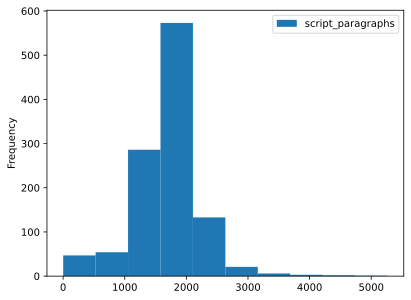

In [30]:
_ = df_n_paras.plot.hist()

## Models

### Neural Network (LSTM RNN)

#### Text Transformers

In [109]:
class KerasTextVectorizer(skl.base.TransformerMixin):
    def __init__(self, 
        vocabulary=None, 
        pad_to_last_sequence=False,
        padding=None,
        **options
    ):
        self._state = dict(
            has_vocab=vocabulary is not None,
            pad_to_last_sequence=pad_to_last_sequence,
            padding=padding
        )

        self.base = keras.Sequential([
            keras.layers.InputLayer(input_shape=(), dtype='string'),
            keras.layers.TextVectorization(
                **options, 
                name='text_vec',
                ragged=True if pad_to_last_sequence else False,
                vocabulary=vocabulary
            )
        ])

    def fit(self, X, _y=None):
        if not self._state['has_vocab']:
            self.base.get_layer('text_vec').adapt(X)

        self.base.compile()
        return self

    def vocabulary_size(self):
        return self.base.get_layer('text_vec').vocabulary_size()

    def transform(self, X, _y=None):
        r = self.base(X)
        if (isinstance(r, tf.RaggedTensor) 
                and self._state.get('pad_to_last_sequence')):
            last_seq_len = self._state.get('last_seq_length')

            if last_seq_len is not None:
                r = r.to_tensor(
                    default_value=self._state.get('padding'), 
                    shape=[None, last_seq_len]
                )
            else:
                r = r.to_tensor()
                self._state['last_seq_length'] = r.shape[-1]
                
        return r

    def __getstate__(self):
        return dict(
            config=self.base.get_config(),
            weights=self.base.get_weights(),
            state=self._state
        )

    def __setstate__(self, d):
        self.base = keras.Sequential.from_config(d['config'])
        if not tf.equal(tf.size(d['weights']), 0):
            self.base.set_weights(d['weights'])
        self._state = d['state']

In [110]:
class SpacyTextVectorizer(KerasTextVectorizer):
    def __init__(self, **kwargs):
        %package spacy[cuda-autodetect,transformers,lookups]

        import spacy
        #import spacy_transformers
        spacy.prefer_gpu()
        
        #spacy.cli.download('en_core_web_lg', False, False, '--quiet')

        nlp = spacy.load('en_core_web_lg')
        super().__init__(
            vocabulary=list(nlp.vocab.strings),
            **kwargs
        )

#### Classifier

In [111]:
class KerasTextClassifier(skeras.wrappers.KerasClassifier):
    def __init__(self, vocabulary_size, **kwargs):
        super().__init__(**kwargs)
        self.vocabulary_size = vocabulary_size

    # see https://www.adriangb.com/scikeras/stable/notebooks/MLPClassifier_MLPRegressor.html#4.1-Subclassing
    def _keras_build_fn(self, meta, compile_kwargs, params):
        layers = []

        # input
        layers += [
            keras.layers.InputLayer(
                input_shape=self.X_shape_[1:],
                ragged=True
            ),
            keras.layers.Embedding(
                input_dim=self.vocabulary_size,
                output_dim=128,
                mask_zero=True
            )
        ]

        # hidden layers
        layers += [
            #keras.layers.Conv1D(
            #    filters=32, kernel_size=3, 
            #    padding='same', 
            #    activation='relu'
            #),
            #keras.layers.MaxPooling1D(pool_size=10),
            #keras.layers.Dropout(.1),

            keras.layers.SpatialDropout1D(.2),

            keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(64)),

            keras.layers.Dense(128, activation='relu')
        ]

        # output
        if self.target_type_ == 'binary':
            layers += [
                keras.layers.Dense(
                    units=1,
                    activation='sigmoid'
                )
            ]
        elif self.target_type_ == 'multiclass':
            layers += [
                keras.layers.Dense(
                    units=self.n_classes_,
                    activation='softmax'
                )
            ]
        else:
            raise NotImplementedError(
                fr'unsupported task type: {self.target_type_}'
            )
        
        return keras.Sequential(layers)

    def fit(self, X, y, sample_weight=None, **kwargs):
        self._save_meta = dict(
            shape_X=np.shape(X),
            y_fit=y
        )
        return super().fit(X, y, sample_weight, **kwargs)

    def __getstate__(self):
        return dict(
            model=self.model_,
            meta=self._save_meta
        )

    def __setstate__(self, d):
        super().__init__(d['model'])
        self.initialize(
            np.zeros(d['meta']['shape_X']),
            d['meta']['y_fit']
        )

#### Predictor (Vocab From Spacy)

In [112]:
class TextClassifierCV(
    skl.base.BaseEstimator,
    skl.base.ClassifierMixin
):
    def __init__(self, 
        options_vectorizer=dict(),
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        super().__init__()
        self.options_vectorizer = options_vectorizer
        self.options_clf = options_clf
        self.options_gridsearch = options_gridsearch

    def fit(self, X, y):
        self.vectorizer = (
            KerasTextVectorizer(
                **self.options_vectorizer,
                output_mode='int',
                sparse=False,
                #pad_to_last_sequence=True,
                output_sequence_length=128
            )
                .fit(X)
        )

        X = self.vectorizer.transform(X)
        self.base = (
            skl.model_selection.GridSearchCV(
                KerasTextClassifier(
                    **self.options_clf,
                    optimizer=tf.keras.optimizers.legacy.Adam(),
                    loss='sparse_categorical_crossentropy',
                    vocabulary_size=self.vectorizer.vocabulary_size(),
                    metrics=['accuracy']
                ),
                **self.options_gridsearch,
                param_grid={
                    'epochs': [50],
                    'batch_size': [1024],
                    #'optimizer__learning_rate': [.01]
                },
                cv=skl.model_selection.RepeatedStratifiedKFold(
                    n_splits=3, n_repeats=1
                )
            )
                .fit(X, y)
        )

        return self

    def best_model(self):
        return skl.pipeline.Pipeline([
            ('vectorizer', self.vectorizer),
            ('model', self.base.best_estimator_)
        ])

    def predict(self, X):
        X = self.vectorizer.transform(X)
        return self.base.predict(X)

    def score(self, X, y):
        X = self.vectorizer.transform(X)
        return self.base.score(X, y)

In [113]:
class IMSDBParagraphTrainer:
    def __init__(self, 
        col_name='movie_name', 
        col_script_paragraphs='script_paragraphs',
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        self.col_name = col_name
        self.col_script_paragraphs = col_script_paragraphs

        self.base = TextClassifierCV(
            options_vectorizer=dict(
                max_tokens=None,
                standardize='lower_and_strip_punctuation',
                split='whitespace',
                #ngrams=(1, 2),
                #output_sequence_length=64
            ),
            options_clf=dict(
                **options_clf,
            ),
            options_gridsearch=dict(
                refit=True,
                **options_gridsearch
            )
        )

    def fit(self, df: pd.DataFrame):
        self.base = self.base.fit(
            X=df[self.col_script_paragraphs],
            y=df[self.col_name]
        )
        return self

    def predict(self, script_paragraphs: pd.Series):
        return self.base.predict(script_paragraphs)

    def best_model(self):
        return self.base.best_model()

    def best_score(self):
        return self.base.base.best_score_

In [114]:
%tensorboard --logdir '{session_storage}/tensorboard/model_nn_spacy'

model = IMSDBParagraphTrainer(
    options_clf=dict(
        verbose=0,
        callbacks=[
            keras.callbacks.TensorBoard(
                fr'{session_storage}/tensorboard/model_nn_spacy'
            ),
            tfa.callbacks.TQDMProgressBar(
                show_epoch_progress=False
            )
            #keras.callbacks.EarlyStopping(
            #    monitor='loss', 
            #    patience=3, 
            #    min_delta=0.0001
            #)
        ]
    ),
    options_gridsearch=dict(
        verbose=3,
        #n_jobs=-1
    )
)

Reusing TensorBoard on port 6006 (pid 123661), started 0:24:29 ago. (Use '!kill 123661' to kill it.)

Train on the first few samples

In [ ]:
df_scripts_para_ = df_scripts_para.drop(df_scripts_outliers.index)
df_scripts_para_ = df_scripts_para_[
    df_scripts_para_['movie_name'].isin(
        pd.Series(df_scripts_para_['movie_name'].unique()).head(100)
    )
]
df_scripts_para_['movie_name'] = (
    df_scripts_para_['movie_name']
        .cat.remove_unused_categories()
)
#df_scripts_para_ = df_scripts_para_.groupby('movie_name').head(1000)

_ = model.fit(df_scripts_para_)

In [108]:
keras.backend.clear_session()

Train on the whole dataset

In [115]:
_ = model.fit(df_scripts_para)

: 

: 

In [91]:
model.best_score()

0.8258998365343433

Save the best model

In [92]:
clf_best = model.best_model()

In [100]:
clf_best.predict(X=np.array([
    'test', 
    'heehee', 
    'very funny', 
    'can you believe it? she ate the whole thing',
    # description of movie Groundhog Day
    '''
    A cynical TV weatherman finds himself reliving the same day 
    over and over again when he goes on location to the small town 
    of Punxsutawney to film a report about their annual Groundhog Day. 
    His predicament drives him to distraction, 
    until he sees a way of turning the situation to his advantage.
    ''',
    '''
    A cynical TV weatherman finds himself reliving the same day 
    over and over again when he goes on location to a small town
    to film a report about their annual festival. 
    His predicament drives him to distraction, 
    until he sees a way of turning the situation to his advantage.
    ''',
    '''
    TV weatherman went to a small town to film a report about a festival 
    and got trapped in a time loop.
    '''
]))

array(['12 Years a Slave', 'Groundhog Day', 'Groundhog Day',
       '10 Things I Hate About You', 'Groundhog Day', 'Groundhog Day',
       'Groundhog Day'], dtype=object)

In [50]:
import pickle

with open(fr'{session_storage}/clf_nn_spacy', 'wb') as f:
    pickle.dump(clf_best, f)

INFO:tensorflow:Assets written to: ram:///tmp/tmpyzj6aei4/assets


INFO:tensorflow:Assets written to: ram:///tmp/tmpyzj6aei4/assets


Load the best model

In [51]:
with open(fr'{session_storage}/clf_nn_spacy', 'rb') as f:
    clf_best = pickle.load(f)

In [52]:
clf_best.predict(X=np.array(['test']))

1/1 [==============================] - 1s 1s/step


array(['Anastasia'], dtype=object)

In [472]:
def _clf_test_script_28_days_later(model, df):
    sample = df[df['movie_name'] == '28 Days Later']
    if sample.empty:
        return

    sample_para = '''
    With practiced speed, Selena starts to open the kitchen
          cupboards, selecting packets of biscuits and cans from the
          shelves, and stuffing them into her backpack.
    '''
    return model.predict(X=np.array([
        sample_para,
        'Selena took food from kitchen shelves',
        'Woman backpacking biscuits and cans in the kitchen',
        'Woman searching for food',
        'Selena Quintanilla nació el 16 de abril de 1971 en Lake Jackson, Texas, Estados Unidos',
        'Selena Quintanilla was born on April 16, 1971, in Lake Jackson, Texas, United States',
        'Script'
    ]))
    
_clf_test_script_28_days_later(model, df_scripts_para)

array([['28 Days Later Script'],
       ['28 Days Later Script'],
       ['Blast from the Past, The Script'],
       ['Hackers Script'],
       ['Un Singe en Hiver Script'],
       ['28 Days Later Script'],
       ['Clash of the Titans Script']], dtype=object)

In [455]:
def _clf_test_script_bad_dreams(model, df):
    sample = df[df['movie_name'] == 'Bad Dreams']
    if sample.empty:
        return

    sample_para = sample.iloc[0]['script_paragraphs']

    print(sample_para)
    return model.predict(X=np.array([
        sample_para,
        'Synthia betrayed Unity House and is ashamed of herself',
        'Woman betrayed the cult and is ashamed of herself',
        'Woman betrayed the cult',
        'Woman is ashamed of herself',
        'Woman',
        'Script'
    ]))

_clf_test_script_bad_dreams(model, df_scripts_para)

CYNTHIA (CONT'D)
               I'm guilty of lying... to Unity
               House. I promised to be part of
               it... Forever. They expected me
               to keep my word.
                   (pause)
               They still do.


array([['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script']], dtype=object)